# Sección NLP: "El Crítico de Cine"

### Tu Objetivo:
Debes superar el **82% de Accuracy Final** en la evaluación del modelo
1.  Aumentando el **Nº de Palabras** que lee el modelo.
2.  Introduciendo **redes recurrentes (RNNs/LSTMs)** en la estructuras del modelo.
3.  Aplicando técnicas de **regularización** como Dropout y Callback para controlar el **overfitting**.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(33)
tf.random.set_seed(33)

In [6]:
max_features = 10_000  # Solo consideramos las 10,000 palabras más comunes
maxlen = 200           # Longitud máxima de las críticas definida por el becario
                      # Una crítica promedio tiene cientos de palabras

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}")

x_train shape: (25000, 200)


## Código a mejorar:

Este es el bloque que debes modificar por completo. 
* Actualmente usa una red densa (`Dense`) después de un `Flatten`. Esto destruye la información temporal.
* Tu objetivo es implementar una arquitectura secuencial (RNN, LSTM, GRU).

In [7]:
model = keras.Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(max_features, 128),
    layers.Bidirectional(layers.GRU(64, dropout=0.3, recurrent_dropout=0.0)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362,817 (5.20 MB)

 Trainable params: 1,362,817 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del Modelo

In [8]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=1, min_lr=1e-5
    )
]

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1, callbacks=callbacks)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 250ms/step - accuracy: 0.7283 - loss: 0.5125 - val_accuracy: 0.8278 - val_loss: 0.3856 - learning_rate: 0.0010
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 251ms/step - accuracy: 0.8773 - loss: 0.3044 - val_accuracy: 0.8734 - val_loss: 0.3191 - learning_rate: 0.0010
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 250ms/step - accuracy: 0.9190 - loss: 0.2181 - val_accuracy: 0.8436 - val_loss: 0.3972 - learning_rate: 0.0010
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 251ms/step - accuracy: 0.9456 - loss: 0.1493 - val_accuracy: 0.8488 - val_loss: 0.4097 - learning_rate: 5.0000e-04


## Gráficos del entrenamiento

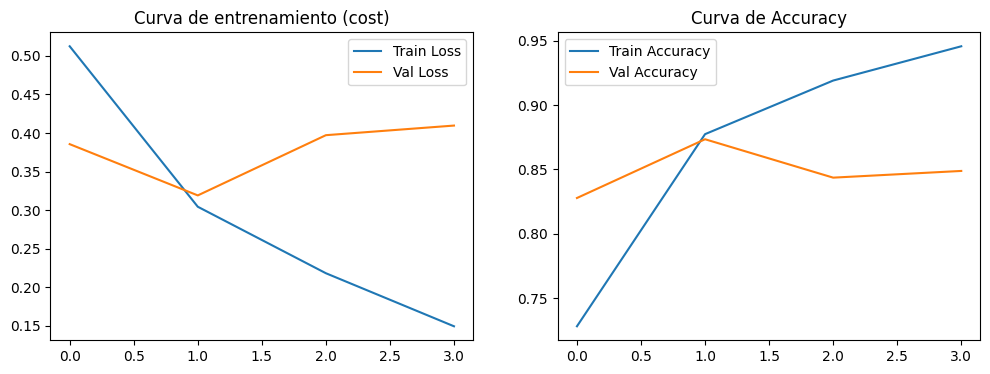

In [9]:
plt.figure(figsize=(12, 4))

# 1. Gráfica de cost
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Curva de entrenamiento (cost)')
plt.legend()

# 2. Gráfica de Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Curva de Accuracy')
plt.legend()

plt.show()

## Accuracy Final

In [10]:
results = model.evaluate(x_test, y_test, verbose=1)

print("---------------------------------")
print(f"Accuracy final: {results[1]*100:.2f}%")
print("---------------------------------\n")

if results[1] < 0.82:
    print("No has superado el baseline de accuracy, toca repetir.\n")
elif results[1] <= 0.86:
    print("Es buen modelo, aunque podrias aplicar algunas mejoras más.\n")
else:
    print("Buen trabajo, has conseguido un muy buen modelo.\n")

782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8616 - loss: 0.3419
---------------------------------
Accuracy final: 86.16%
---------------------------------

Buen trabajo, has conseguido un muy buen modelo.

